In [1]:
import numpy as np
import matplotlib.pyplot as plt

## ВАРИАНТ 3

# Задание №2

In [2]:
x = np.array([
	[1, -4, -2],
	[1, 2, 0],
	[1, 0, 1],
	[1, 2, 1],
])
x

array([[ 1, -4, -2],
       [ 1,  2,  0],
       [ 1,  0,  1],
       [ 1,  2,  1]])

In [3]:
y = np.array([
	[0],
	[3],
	[6],
	[8]
])
y

array([[0],
       [3],
       [6],
       [8]])

$$f(x) = k_0 + k_1x_1 + k_2x_2\space-> xk = y\space-> x^Txk = x^Ty$$

In [4]:
xTx = x.T @ x
xTx

array([[ 4,  0,  0],
       [ 0, 24, 10],
       [ 0, 10,  6]])

In [5]:
xTy = x.T @ y
xTy

array([[17],
       [22],
       [14]])

In [11]:
k = np.linalg.solve(xTx, xTy)
k

array([[ 4.25      ],
       [-0.18181818],
       [ 2.63636364]])

## Задание №3

In [6]:
x_data = np.array([2, 6, 5])
y_data = np.array([5, 3, 6])
const_m = np.array([[1, 0, 0], [-3, 4, -1], [2, -4, 2]])

In [7]:
x_data_interpolation = const_m @ x_data
x_data_interpolation

array([  2,  13, -10])

In [8]:
y_data_interpolation = const_m @ y_data
y_data_interpolation

array([ 5, -9, 10])

In [9]:
t = np.linspace(-10, 10, 1000)
x = x_data_interpolation[0] + x_data_interpolation[1] * t + x_data_interpolation[2] * t ** 2
y = y_data_interpolation[0] + y_data_interpolation[1] * t + y_data_interpolation[2] * t ** 2

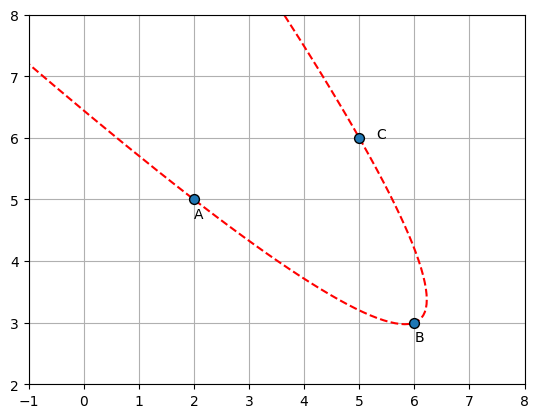

In [10]:
plt.scatter(x_data, y_data, s=50, ec="black", zorder=3)
plt.plot(x, y, "r--")
plt.xlim((-1, 8))
plt.ylim((2, 8))
plt.annotate("A", xy=(2, 5), xytext=(2, 4.7))
plt.annotate("B", xy=(6, 3), xytext=(6, 2.7))
plt.annotate("C", xy=(5, 6), xytext=(5.3, 6))
plt.grid()